In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=20,
                  n_features=2, 
                  centers=2, 
                  cluster_std=2, 
                  random_state=3)




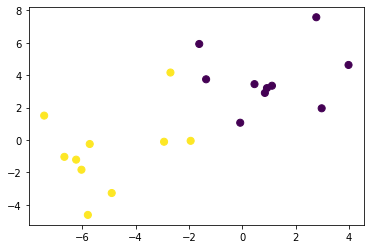

In [2]:
plt.scatter(X[:,0], X[:,1], c=y, s=50)

In [3]:
def plotBoundary(X, clf, mesh=True, boundary=True, cmap=plt.get_cmap()):
    x_min = min(X[:, 0])
    x_max = max(X[:, 0])
    y_min = min(X[:, 1])
    y_max = max(X[:, 1])

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

    z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    z = z.reshape(XX.shape)

    if mesh:
        plt.pcolormesh(XX, YY, z, zorder=-10)
    if boundary:
        plt.contourf(XX, YY, z, colors='k', linestyle='-', levels=[0.5] )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)


In [36]:
from sklearn.linear_model import Perceptron

clf = Perceptron()

clf.fit(X, y)


Perceptron()

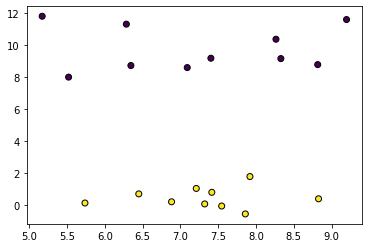

In [37]:
plt.scatter(X[:,0], X[:,1], marker='o', c=y, edgecolors='k')


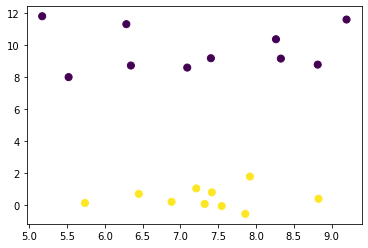

In [4]:
X, y = make_blobs(n_samples=20, n_features=2, centers=2, cluster_std=1, random_state=8) 

plt.scatter(X[:,0], X[:,1], c=y, s=50)


In [5]:
for s in range(10):
    clf.random_state = s
    clf.fit(X, y)
    plotBoundary(X, clf, mesh=False)

plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=50, edgecolors='k')


NameError: name 'clf' is not defined

In [7]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [27]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train,y_test = y[train_index], y[test_index]

In [28]:
from sklearn.linear_model import Perceptron

In [29]:
clf = Perceptron()
clf.fit(X_train, y_train)

Perceptron()

In [30]:
clf.score(X_test, y_test)

0.6491228070175439

1 0.6491228070175439
2 0.8333333333333334
3 0.7105263157894737
4 0.8333333333333334
5 0.8421052631578947
6 0.7719298245614035
7 0.8421052631578947
8 0.7631578947368421
9 0.7631578947368421
10 0.7631578947368421
11 0.7894736842105263
12 0.8508771929824561
13 0.9210526315789473
14 0.9210526315789473
15 0.9210526315789473
16 0.8596491228070176
17 0.8333333333333334
18 0.8508771929824561
19 0.8333333333333334
20 0.8333333333333334
21 0.8333333333333334
22 0.8508771929824561
23 0.8421052631578947
24 0.8333333333333334
25 0.8333333333333334
26 0.8333333333333334
27 0.8333333333333334
28 0.8333333333333334
29 0.9210526315789473
30 0.8947368421052632
31 0.9298245614035088
32 0.8421052631578947
33 0.8245614035087719
34 0.8333333333333334
35 0.8333333333333334
36 0.8333333333333334
37 0.8333333333333334
38 0.8508771929824561
39 0.8859649122807017
40 0.8333333333333334
41 0.8333333333333334
42 0.8333333333333334
43 0.8333333333333334
44 0.8333333333333334
45 0.8859649122807017
46 0.87719298245614

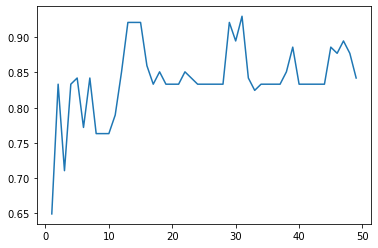

In [31]:
clf = Perceptron(warm_start=True, n_jobs=1)

scores = []
n_range = range(1,50)

for n in n_range:
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(n, score)
    scores.append(score)
    
scores = np.array(scores)

plt.plot(n_range, scores)


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [33]:

scores

array([0.64912281, 0.83333333, 0.71052632, 0.83333333, 0.84210526,
       0.77192982, 0.84210526, 0.76315789, 0.76315789, 0.76315789,
       0.78947368, 0.85087719, 0.92105263, 0.92105263, 0.92105263,
       0.85964912, 0.83333333, 0.85087719, 0.83333333, 0.83333333,
       0.83333333, 0.85087719, 0.84210526, 0.83333333, 0.83333333,
       0.83333333, 0.83333333, 0.83333333, 0.92105263, 0.89473684,
       0.92982456, 0.84210526, 0.8245614 , 0.83333333, 0.83333333,
       0.83333333, 0.83333333, 0.85087719, 0.88596491, 0.83333333,
       0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.88596491,
       0.87719298, 0.89473684, 0.87719298, 0.84210526])

1 0.9736842105263158
2 0.9736842105263158
3 0.9736842105263158
4 0.9736842105263158
5 0.9649122807017544
6 0.9736842105263158
7 0.8859649122807017
8 0.956140350877193
9 0.956140350877193
10 0.9649122807017544
11 0.9122807017543859
12 0.9649122807017544
13 0.9649122807017544
14 0.9122807017543859
15 0.9649122807017544
16 0.9649122807017544
17 0.9649122807017544
18 0.9649122807017544
19 0.9473684210526315
20 0.9736842105263158
21 0.9649122807017544
22 0.9736842105263158
23 0.9473684210526315
24 0.956140350877193
25 0.9473684210526315
26 0.9649122807017544
27 0.956140350877193
28 0.9649122807017544
29 0.9473684210526315
30 0.9649122807017544
31 0.9473684210526315
32 0.956140350877193
33 0.956140350877193
34 0.956140350877193
35 0.956140350877193
36 0.9649122807017544
37 0.9824561403508771
38 0.956140350877193
39 0.9473684210526315
40 0.9473684210526315
41 0.9385964912280702
42 0.9473684210526315
43 0.956140350877193
44 0.9649122807017544
45 0.956140350877193
46 0.9649122807017544
47 0.929

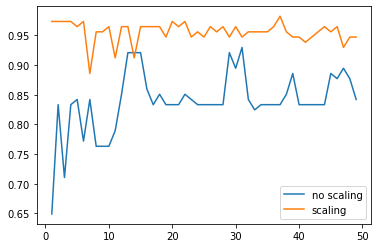

In [34]:
clf = Perceptron(warm_start=True, n_jobs=1)

scores2 = []
n_range = range(1,50)

for n in n_range:
    clf.fit(X_train_scale, y_train)
    score = clf.score(X_test_scale, y_test)
    print(n, score)
    scores2.append(score)
    
scores2 = np.array(scores2)

plt.plot(n_range, scores, label='no scaling')
plt.plot(n_range, scores2, label='scaling')
plt.legend(loc="best")